# Determine Where to Send Taxis

***

## Project Description

You’ve been hired to help Super Taxis determined the best approach to allocate the taxi fleet around three key pickup areas of interest throughout the day. You'll start by exploring and preparing the 2015 taxi pickup data. Then you'll train, validate, and test machine learning models. Finally, you will use your best model to make predictions for the distribution of pickups in 2016. 

Analyze the data in the taxiPickups table. At a minimum, provide a visualization of the distribution (histogram) of the response variable TripCount, as well as a box plot for TripCount grouped by Location. 

Use cvpartition to separate 20% of the data set for testing later on, and create the training data. Ensure your results are repeatable by setting the random number generator seed to 10. Provide your code. 

As the focus of this course is machine learning, we’ve provided a function to do some feature engineering for you. Use providedPreprocessing.mlx to add the following features to your training/validation data set:

- TimeOfDay (numerical)

- DayOfWeek (categorical)

- DayOfMonth (numerical)

- DayOfYear (numerical) 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|VendorID  | A code indicating the TPEP provider that provided the record	|
|PickupTime| The date and time when the meter was engaged.	|
|DropoffTime |The date and time when the meter was disengaged.	|
|Passengers |The number of passengers in the vehicle	|
|Distance |The elapsed trip distance in miles reported by the taximeter	|
|PickupLon |	|
|PickupLat |	|
|RateCode |	The final rate code in effect at the end of the trip|
|HeldFlag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor	|
|DropoffLon |	|
|DropoffLat |	|
|PayType|A numeric code signifying how the passenger paid for the trip	|
|Fare |The time-and-distance fare calculated by the meter	|
|ExtraCharge |Miscellaneous extras and surcharge	|
|Tax |MTA tax that is automatically triggered based 	|
|Tip |This field is automatically populated for credit card tips	|
|Tolls |Total amount of all tolls paid in trip	|
|ImpSurcharge |	improvement surcharge assessed trips at the flag drop|
|TotalCharge | The total amount charged to passengers	|
|Duration |	|
|AveSpeed |  |
|Location |  |

## Summary

## Recommendation for Action

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import ppscore as pps

import sklearn

import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta


import scipy.stats

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
from feature_engine.outliers import Winsorizer



from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("week3.csv",parse_dates=['PickupTime','DropoffTime'])

In [3]:
df

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location
0,1,2015-12-01 00:00:00,2015-12-01 00:29:35,1,18.60,-73.78,40.64,JFK,N,-74.00,40.72,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,JFK
1,2,2015-12-04 19:00:00,2015-12-04 19:11:56,2,0.33,-73.98,40.76,Standard,N,-73.98,40.75,Cash,3.50,1.00,0.50,0.00,0.00,0.30,5.30,2.67,7.42,Manhattan
2,1,2015-12-04 19:00:00,2015-12-04 19:27:42,1,8.70,-73.87,40.77,Standard,N,-73.97,40.69,Cash,25.50,1.00,0.50,0.00,0.00,0.30,27.30,18.32,28.50,LaGuardia
3,2,2015-12-04 19:00:00,2015-12-04 19:31:36,1,1.55,-73.98,40.75,Standard,N,-73.99,40.76,Credit card,13.50,1.00,0.50,3.82,0.00,0.30,19.12,21.32,4.36,Manhattan
4,1,2015-12-04 19:00:00,2015-12-04 19:17:47,1,0.90,-73.99,40.76,Standard,N,-73.99,40.75,Dispute,6.00,1.00,0.50,0.00,0.00,0.30,7.80,6.55,8.24,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31525,2,2015-12-31 23:00:00,2016-01-01 00:12:14,2,16.98,-73.78,40.64,JFK,N,-73.98,40.75,Credit card,52.00,0.00,0.50,11.67,5.54,0.30,70.01,25.25,40.35,JFK
31526,1,2015-12-31 23:00:00,2015-12-31 23:58:53,1,1.40,-73.98,40.76,Standard,N,-73.96,40.77,Credit card,7.00,0.50,0.50,1.65,0.00,0.30,9.95,5.42,15.51,Manhattan
31527,2,2015-12-31 23:00:00,2016-01-01 00:02:57,2,1.44,-73.99,40.75,Standard,N,-74.01,40.74,Cash,7.00,0.50,0.50,0.00,0.00,0.30,8.30,6.25,13.82,Manhattan
31528,1,2015-12-31 23:00:00,2015-12-31 23:59:25,1,0.10,-73.99,40.76,Standard,N,-73.99,40.76,Credit card,3.50,0.50,0.50,0.95,0.00,0.30,5.75,1.92,3.13,Manhattan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31530 entries, 0 to 31529
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Vendor        31530 non-null  int64         
 1   PickupTime    31530 non-null  datetime64[ns]
 2   DropoffTime   31530 non-null  datetime64[ns]
 3   Passengers    31530 non-null  int64         
 4   Distance      31530 non-null  float64       
 5   PickupLon     31530 non-null  float64       
 6   PickupLat     31530 non-null  float64       
 7   RateCode      31530 non-null  object        
 8   HeldFlag      31530 non-null  object        
 9   DropoffLon    31530 non-null  float64       
 10  DropoffLat    31530 non-null  float64       
 11  PayType       31530 non-null  object        
 12  Fare          31530 non-null  float64       
 13  ExtraCharge   31530 non-null  float64       
 14  Tax           31530 non-null  float64       
 15  Tip           31530 non-null  float6

In [5]:
df.describe(include='all')

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location
count,31530.00,31530,31530,31530.00,31530.00,31530.00,31530.00,31530,31530,31530.00,31530.00,31530,31530.00,31530.00,31530.00,31530.00,31530.00,31530.00,31530.00,31530.00,31530.00,31530
unique,NaN,744,31293,NaN,NaN,NaN,NaN,5,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2015-12-07 21:00:00,2015-12-24 09:34:10,NaN,NaN,NaN,NaN,Standard,N,NaN,NaN,Credit card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
freq,NaN,91,3,NaN,NaN,NaN,NaN,28611,31278,NaN,NaN,18617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21411
first,NaN,2015-12-01 00:00:00,2015-12-01 00:06:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-31 23:00:00,2016-01-01 00:12:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.54,NaN,NaN,1.71,5.70,-73.94,40.74,NaN,NaN,-73.97,40.75,NaN,20.41,0.28,0.50,2.68,1.17,0.30,25.34,21.66,13.98,NaN
std,0.50,NaN,NaN,1.33,6.02,0.08,0.04,NaN,NaN,0.04,0.03,NaN,15.87,0.36,0.00,3.68,2.28,0.00,19.80,17.04,8.65,NaN
min,1.00,NaN,NaN,1.00,0.03,-74.00,40.64,NaN,NaN,-74.19,40.57,NaN,2.50,0.00,0.50,0.00,0.00,0.30,3.30,1.02,0.12,NaN
25%,1.00,NaN,NaN,1.00,1.19,-73.99,40.75,NaN,NaN,-73.99,40.74,NaN,8.00,0.00,0.50,0.00,0.00,0.30,9.95,9.18,7.47,NaN


In [6]:
df2 = pd.read_csv("tripcounts.csv", parse_dates=["PickupTime"])

In [7]:
df2

,PickupTime,Location,TripCount
0,2015-01-01 00:00:00,Manhattan,22
1,2015-01-01 00:00:00,LaGuardia,2
2,2015-01-01 00:00:00,JFK,2
3,2015-01-01 01:00:00,Manhattan,10
4,2015-01-01 01:00:00,LaGuardia,0
...,...,...,...
26212,2015-12-31 22:00:00,LaGuardia,9
26213,2015-12-31 22:00:00,JFK,12
26214,2015-12-31 23:00:00,Manhattan,24
26215,2015-12-31 23:00:00,LaGuardia,2


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PickupTime  26217 non-null  datetime64[ns]
 1   Location    26217 non-null  object        
 2   TripCount   26217 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 614.6+ KB


In [9]:
df2.describe(include='all')

,PickupTime,Location,TripCount
count,26217,26217,26217.00
unique,8739,3,NaN
top,2015-02-23 10:00:00,LaGuardia,NaN
freq,3,8739,NaN
first,2015-01-01 00:00:00,NaN,NaN
last,2015-12-31 23:00:00,NaN,NaN
mean,NaN,NaN,14.99
std,NaN,NaN,14.89
min,NaN,NaN,0.00
25%,NaN,NaN,4.00


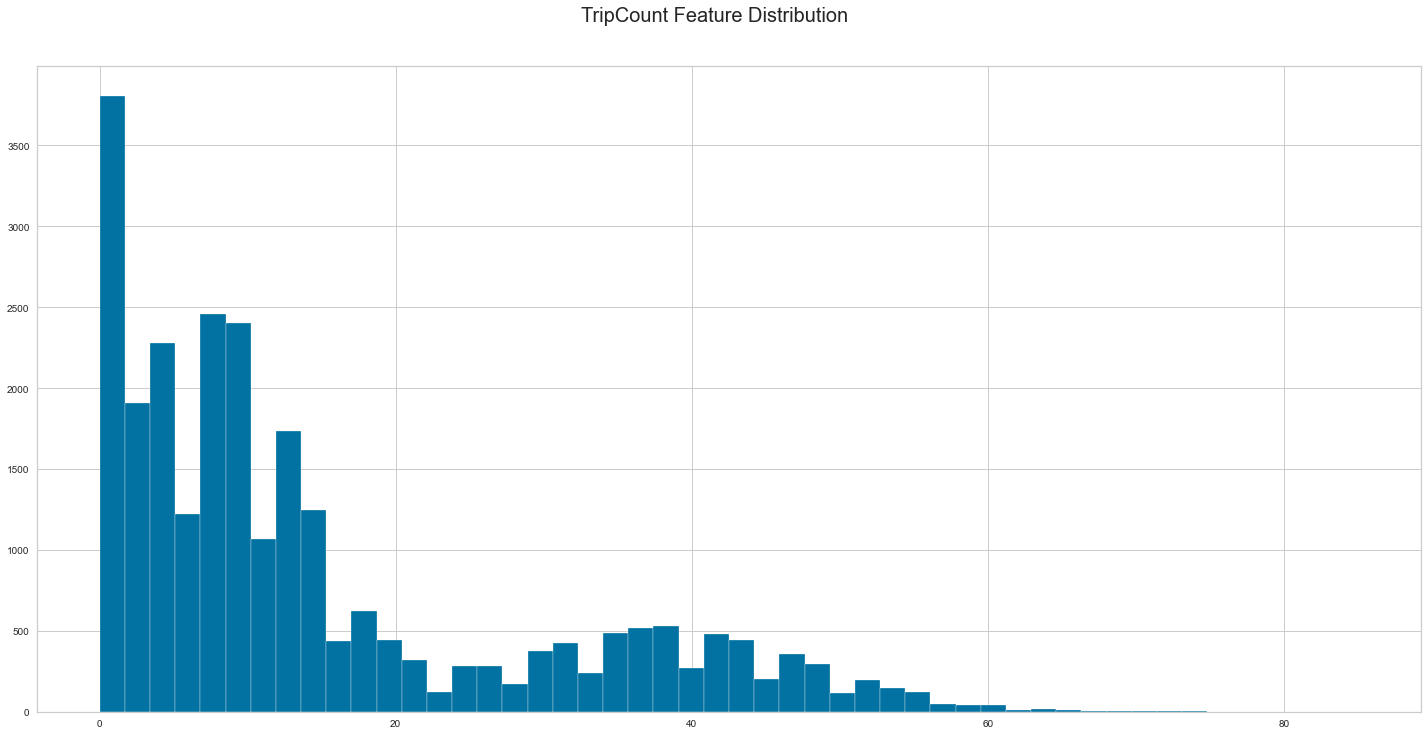

In [10]:
df2["TripCount"].hist(bins=50, figsize=(20,10))
plt.suptitle('TripCount Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

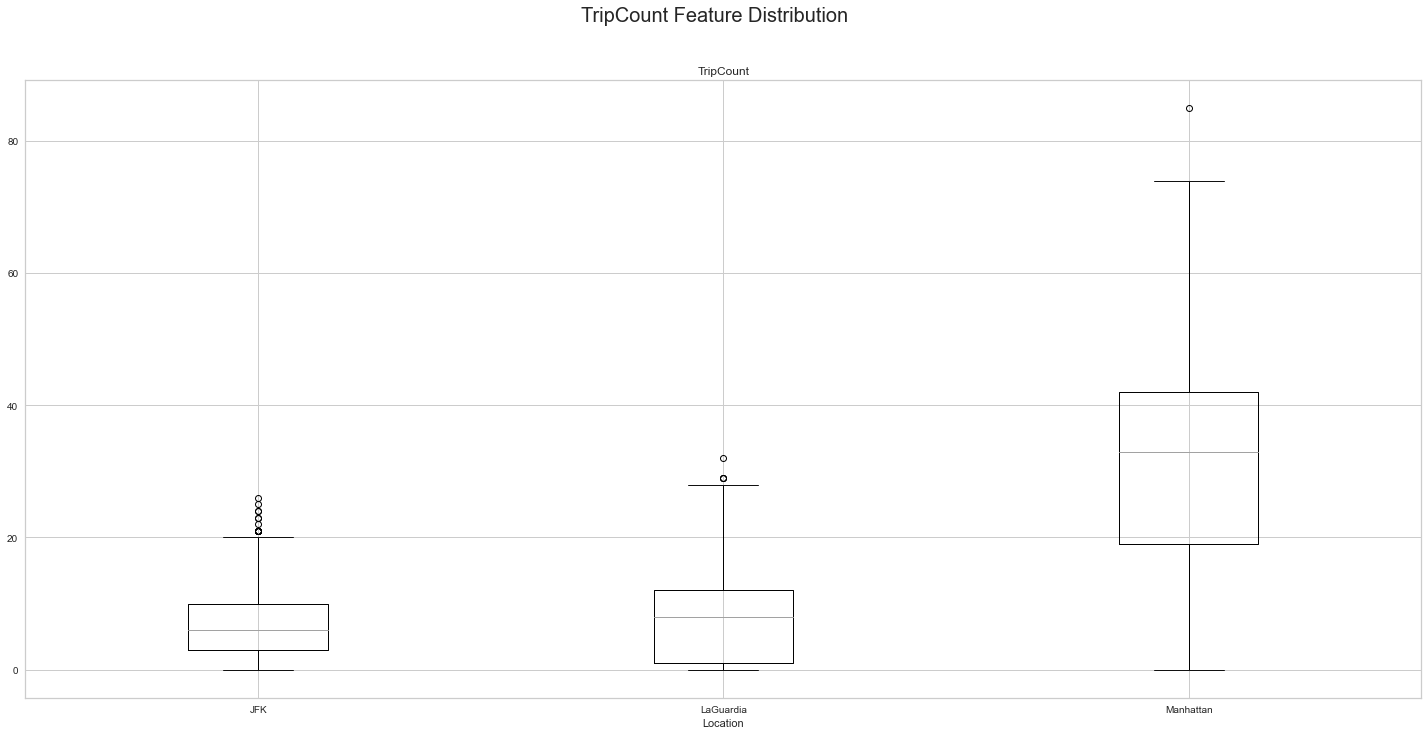

In [11]:
df2.boxplot(figsize=(20,10), by="Location")
plt.suptitle('TripCount Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xlabel("Location")
plt.tight_layout()
plt.show()

In [12]:
df3 = pd.read_csv("bydays.csv", parse_dates=['PickupTime'])

In [13]:
df3

,PickupTime,Location,TimeOfDay,DayOfWeek,DayOfMonth,DayOfYear
0,2016-01-01 05:49:12,Manhattan,5.82,Friday,1,1
1,2016-01-01 05:49:12,LaGuardia,5.82,Friday,1,1
2,2016-01-01 05:49:12,JFK,5.82,Friday,1,1
3,2016-01-01 06:49:12,Manhattan,6.82,Friday,1,1
4,2016-01-01 06:49:12,LaGuardia,6.82,Friday,1,1
...,...,...,...,...,...,...
26212,2016-12-31 03:49:12,LaGuardia,3.82,Saturday,31,366
26213,2016-12-31 03:49:12,JFK,3.82,Saturday,31,366
26214,2016-12-31 04:49:12,Manhattan,4.82,Saturday,31,366
26215,2016-12-31 04:49:12,LaGuardia,4.82,Saturday,31,366


In [14]:
df2.head()

,PickupTime,Location,TripCount
0,2015-01-01 00:00:00,Manhattan,22
1,2015-01-01 00:00:00,LaGuardia,2
2,2015-01-01 00:00:00,JFK,2
3,2015-01-01 01:00:00,Manhattan,10
4,2015-01-01 01:00:00,LaGuardia,0


### Merge tables

In [15]:
df4 = pd.merge(df,df2,on='PickupTime',how='inner',indicator=True)

In [16]:
df4

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location_x,Location_y,TripCount,_merge
0,1,2015-12-01 00:00:00,2015-12-01 00:29:35,1,18.60,-73.78,40.64,JFK,N,-74.00,40.72,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,JFK,Manhattan,14,both
1,1,2015-12-01 00:00:00,2015-12-01 00:29:35,1,18.60,-73.78,40.64,JFK,N,-74.00,40.72,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,JFK,LaGuardia,2,both
2,1,2015-12-01 00:00:00,2015-12-01 00:29:35,1,18.60,-73.78,40.64,JFK,N,-74.00,40.72,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,JFK,JFK,15,both
3,2,2015-12-01 00:00:00,2015-12-01 00:07:16,1,1.55,-73.98,40.75,Standard,N,-74.00,40.74,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,Manhattan,Manhattan,14,both
4,2,2015-12-01 00:00:00,2015-12-01 00:07:16,1,1.55,-73.98,40.75,Standard,N,-74.00,40.74,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,Manhattan,LaGuardia,2,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94585,1,2015-12-31 23:00:00,2015-12-31 23:59:25,1,0.10,-73.99,40.76,Standard,N,-73.99,40.76,Credit card,3.50,0.50,0.50,0.95,0.00,0.30,5.75,1.92,3.13,Manhattan,LaGuardia,2,both
94586,1,2015-12-31 23:00:00,2015-12-31 23:59:25,1,0.10,-73.99,40.76,Standard,N,-73.99,40.76,Credit card,3.50,0.50,0.50,0.95,0.00,0.30,5.75,1.92,3.13,Manhattan,JFK,7,both
94587,1,2015-12-31 23:00:00,2016-01-01 00:05:42,1,1.50,-73.99,40.75,Standard,N,-74.01,40.74,Cash,7.50,0.50,0.50,0.00,0.00,0.30,8.80,7.57,11.89,Manhattan,Manhattan,24,both
94588,1,2015-12-31 23:00:00,2016-01-01 00:05:42,1,1.50,-73.99,40.75,Standard,N,-74.01,40.74,Cash,7.50,0.50,0.50,0.00,0.00,0.30,8.80,7.57,11.89,Manhattan,LaGuardia,2,both


In [17]:
df4.columns

Index(['Vendor', 'PickupTime', 'DropoffTime', 'Passengers', 'Distance', 'PickupLon', 'PickupLat', 'RateCode', 'HeldFlag', 'DropoffLon', 'DropoffLat', 'PayType', 'Fare', 'ExtraCharge', 'Tax', 'Tip', 'Tolls', 'ImpSurcharge', 'TotalCharge', 'Duration', 'AveSpeed', 'Location_x', 'Location_y', 'TripCount', '_merge'], dtype='object')

In [18]:
df4.drop(['DropoffTime','PickupLon', 'PickupLat','DropoffLon', 'DropoffLat', 
          'Location_x', 'Location_y','_merge'], axis=1, inplace=True)

In [19]:
df4.head()

,Vendor,PickupTime,Passengers,Distance,RateCode,HeldFlag,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,TripCount
0,1,2015-12-01,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,14
1,1,2015-12-01,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,2
2,1,2015-12-01,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,15
3,2,2015-12-01,1,1.55,Standard,N,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,14
4,2,2015-12-01,1,1.55,Standard,N,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,2


In [20]:
df4["DayOfMonth"] = df4["PickupTime"].dt.day

In [21]:
df4["DayofWeek"] = df4["PickupTime"].dt.weekday

In [22]:
df4.head()

,Vendor,PickupTime,Passengers,Distance,RateCode,HeldFlag,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,TripCount,DayOfMonth,DayofWeek
0,1,2015-12-01,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,14,1,1
1,1,2015-12-01,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,2,1,1
2,1,2015-12-01,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,15,1,1
3,2,2015-12-01,1,1.55,Standard,N,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,14,1,1
4,2,2015-12-01,1,1.55,Standard,N,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,2,1,1


In [23]:
df4.drop(["PickupTime"], axis=1, inplace=True)

In [24]:
df4.head()

,Vendor,Passengers,Distance,RateCode,HeldFlag,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,TripCount,DayOfMonth,DayofWeek
0,1,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,14,1,1
1,1,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,2,1,1
2,1,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,15,1,1
3,2,1,1.55,Standard,N,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,14,1,1
4,2,1,1.55,Standard,N,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,2,1,1


### Predictive Power Score

In [25]:
matrixtable = pps.matrix(df4)

In [26]:
matrixtable

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Vendor,Vendor,1.00,predict_itself,True,None,0.00,1.00,None
1,Vendor,Passengers,0.00,regression,True,mean absolute error,0.74,0.95,DecisionTreeRegressor()
2,Vendor,Distance,0.00,regression,True,mean absolute error,4.46,5.05,DecisionTreeRegressor()
3,Vendor,RateCode,0.00,classification,True,weighted F1,0.86,0.86,DecisionTreeClassifier()
4,Vendor,HeldFlag,0.00,classification,True,weighted F1,0.99,0.99,DecisionTreeClassifier()
5,Vendor,PayType,0.00,classification,True,weighted F1,0.51,0.42,DecisionTreeClassifier()
6,Vendor,Fare,0.00,regression,True,mean absolute error,12.35,13.46,DecisionTreeRegressor()
7,Vendor,ExtraCharge,0.00,regression,True,mean absolute error,0.28,0.33,DecisionTreeRegressor()
8,Vendor,Tax,0.00,target_is_constant,True,None,1.00,1.00,None
9,Vendor,Tip,0.00,regression,True,mean absolute error,2.51,2.78,DecisionTreeRegressor()


In [27]:
pps.predictors(df4, y="TripCount")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Vendor,TripCount,0,regression,True,mean absolute error,11.38,12.42,DecisionTreeRegressor()
1,Passengers,TripCount,0,regression,True,mean absolute error,11.38,12.43,DecisionTreeRegressor()
2,Distance,TripCount,0,regression,True,mean absolute error,11.38,13.56,DecisionTreeRegressor()
3,RateCode,TripCount,0,regression,True,mean absolute error,11.38,12.42,DecisionTreeRegressor()
4,HeldFlag,TripCount,0,regression,True,mean absolute error,11.38,12.42,DecisionTreeRegressor()
5,PayType,TripCount,0,regression,True,mean absolute error,11.38,12.42,DecisionTreeRegressor()
6,Fare,TripCount,0,regression,True,mean absolute error,11.38,12.51,DecisionTreeRegressor()
7,ExtraCharge,TripCount,0,regression,True,mean absolute error,11.38,12.38,DecisionTreeRegressor()
8,Tax,TripCount,0,regression,True,mean absolute error,11.38,12.42,DecisionTreeRegressor()
9,Tip,TripCount,0,regression,True,mean absolute error,11.38,12.81,DecisionTreeRegressor()


### Pearson Correlation

In [28]:
df4.corr()

,Vendor,Passengers,Distance,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,TripCount,DayOfMonth,DayofWeek
Vendor,1.00,0.26,0.04,0.04,0.01,NaN,0.03,0.02,NaN,0.04,0.03,0.04,0.01,0.00,0.01
Passengers,0.26,1.00,0.03,0.03,-0.01,NaN,-0.00,0.03,NaN,0.03,0.03,0.02,0.00,0.02,0.03
Distance,0.04,0.03,1.00,0.97,-0.12,NaN,0.55,0.66,NaN,0.95,0.81,0.73,0.00,-0.01,0.02
Fare,0.04,0.03,0.97,1.00,-0.11,NaN,0.57,0.66,NaN,0.98,0.88,0.63,0.01,-0.03,0.01
ExtraCharge,0.01,-0.01,-0.12,-0.11,1.00,NaN,-0.04,-0.11,NaN,-0.09,-0.11,-0.02,0.02,0.01,-0.16
Tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tip,0.03,-0.00,0.55,0.57,-0.04,NaN,1.00,0.47,NaN,0.70,0.49,0.38,0.02,-0.08,-0.02
Tolls,0.02,0.03,0.66,0.66,-0.11,NaN,0.47,1.00,NaN,0.73,0.58,0.46,0.02,-0.05,0.00
ImpSurcharge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalCharge,0.04,0.03,0.95,0.98,-0.09,NaN,0.70,0.73,NaN,1.00,0.86,0.63,0.02,-0.04,0.00


In [29]:
df4.corr()["TripCount"].sort_values()

DayOfMonth     -0.06
AveSpeed       -0.06
DayofWeek      -0.05
Passengers      0.00
Distance        0.00
Vendor          0.01
Fare            0.01
TotalCharge     0.02
ExtraCharge     0.02
Tolls           0.02
Tip             0.02
Duration        0.04
TripCount       1.00
Tax              NaN
ImpSurcharge     NaN
Name: TripCount, dtype: float64

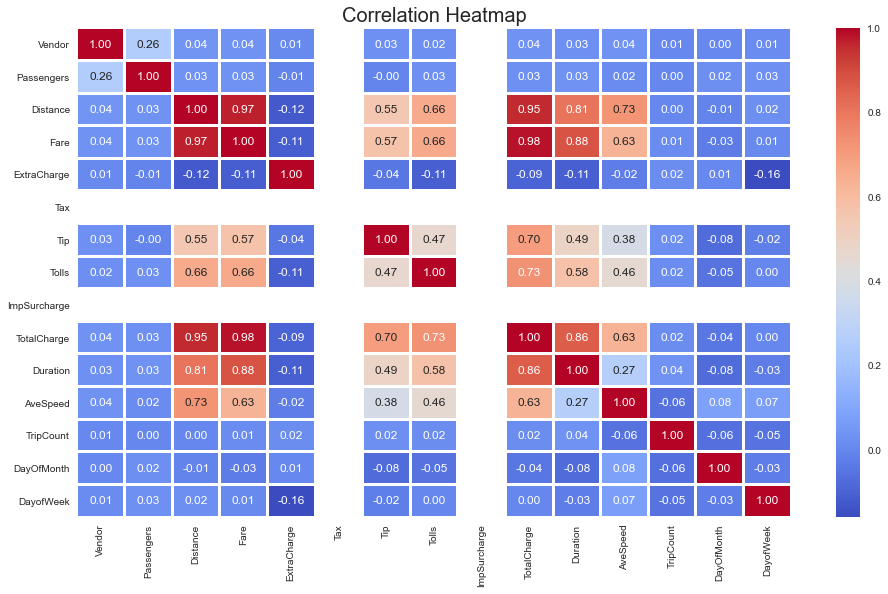

In [30]:
plt.figure(figsize=(16,9))
sns.heatmap(df4.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**Both Correlation calculations cannot tell the relationships**

## Data Preprocessing

### Drop unwanted features

In [31]:
df4.head()

,Vendor,Passengers,Distance,RateCode,HeldFlag,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,TripCount,DayOfMonth,DayofWeek
0,1,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,14,1,1
1,1,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,2,1,1
2,1,1,18.60,JFK,N,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,15,1,1
3,2,1,1.55,Standard,N,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,14,1,1
4,2,1,1.55,Standard,N,Credit card,7.00,0.50,0.50,1.70,0.00,0.30,10.00,5.90,15.76,2,1,1


In [32]:
df4.columns

Index(['Vendor', 'Passengers', 'Distance', 'RateCode', 'HeldFlag', 'PayType', 'Fare', 'ExtraCharge', 'Tax', 'Tip', 'Tolls', 'ImpSurcharge', 'TotalCharge', 'Duration', 'AveSpeed', 'TripCount', 'DayOfMonth', 'DayofWeek'], dtype='object')

In [33]:
df4.drop(['Vendor','RateCode', 'HeldFlag', 'PayType', 'Tax', 'ImpSurcharge', 'DayOfMonth', 'DayofWeek'], axis=1, inplace=True)

In [34]:
df4.head(1)

,Passengers,Distance,Fare,ExtraCharge,Tip,Tolls,TotalCharge,Duration,AveSpeed,TripCount
0,1,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,14


In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94590 entries, 0 to 94589
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengers   94590 non-null  int64  
 1   Distance     94590 non-null  float64
 2   Fare         94590 non-null  float64
 3   ExtraCharge  94590 non-null  float64
 4   Tip          94590 non-null  float64
 5   Tolls        94590 non-null  float64
 6   TotalCharge  94590 non-null  float64
 7   Duration     94590 non-null  float64
 8   AveSpeed     94590 non-null  float64
 9   TripCount    94590 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 7.9 MB


### Treat Missing Values

In [36]:
df4.isnull().sum()

Passengers     0
Distance       0
Fare           0
ExtraCharge    0
Tip            0
Tolls          0
TotalCharge    0
Duration       0
AveSpeed       0
TripCount      0
dtype: int64

### Treat Duplicate Values

In [37]:
df4.duplicated(keep='first').sum()

2810

In [38]:
df4.drop_duplicates(inplace=True)

In [39]:
df4.head()

,Passengers,Distance,Fare,ExtraCharge,Tip,Tolls,TotalCharge,Duration,AveSpeed,TripCount
0,1,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,14
1,1,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,2
2,1,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,15
3,1,1.55,7.00,0.50,1.70,0.00,10.00,5.90,15.76,14
4,1,1.55,7.00,0.50,1.70,0.00,10.00,5.90,15.76,2


### Treat Outliers

In [40]:
df4.describe()

,Passengers,Distance,Fare,ExtraCharge,Tip,Tolls,TotalCharge,Duration,AveSpeed,TripCount
count,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00
mean,1.71,5.71,20.45,0.28,2.69,1.18,25.39,21.74,13.95,17.96
std,1.33,6.03,15.89,0.36,3.69,2.29,19.82,17.07,8.64,14.77
min,1.00,0.03,2.50,0.00,0.00,0.00,3.30,1.02,0.12,0.00
25%,1.00,1.20,8.00,0.00,0.00,0.00,9.95,9.23,7.45,7.00
50%,1.00,2.52,13.50,0.00,1.35,0.00,15.95,16.63,11.63,12.00
75%,2.00,9.55,31.00,0.50,3.86,0.00,39.96,29.27,18.56,30.00
max,6.00,37.20,100.00,1.00,58.85,16.62,119.79,119.63,61.18,64.00


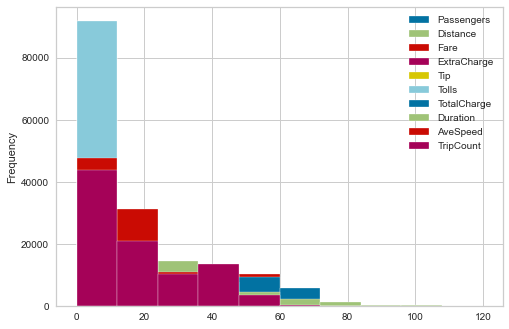

In [41]:
df4.plot(kind='hist')
plt.show()

In [42]:
windsorizer = Winsorizer(capping_method= 'gaussian', tail= 'right', fold=3)

In [43]:
df5 = windsorizer.fit_transform(df4)
df5

,Passengers,Distance,Fare,ExtraCharge,Tip,Tolls,TotalCharge,Duration,AveSpeed,TripCount
0,1.00,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,14.00
1,1.00,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,2.00
2,1.00,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,15.00
3,1.00,1.55,7.00,0.50,1.70,0.00,10.00,5.90,15.76,14.00
4,1.00,1.55,7.00,0.50,1.70,0.00,10.00,5.90,15.76,2.00
...,...,...,...,...,...,...,...,...,...,...
94585,1.00,0.10,3.50,0.50,0.95,0.00,5.75,1.92,3.13,2.00
94586,1.00,0.10,3.50,0.50,0.95,0.00,5.75,1.92,3.13,7.00
94587,1.00,1.50,7.50,0.50,0.00,0.00,8.80,7.57,11.89,24.00
94588,1.00,1.50,7.50,0.50,0.00,0.00,8.80,7.57,11.89,2.00


In [44]:
windsorizer.left_tail_caps_

{}

In [45]:
windsorizer.right_tail_caps_

{'Passengers': 5.700721978285731,
 'Distance': 23.79556636280486,
 'Fare': 68.11142898244495,
 'ExtraCharge': 1.3629433346582107,
 'Tip': 13.756405591323016,
 'Tolls': 8.031811086742453,
 'TotalCharge': 84.86049056661179,
 'Duration': 72.93980523030467,
 'AveSpeed': 39.86494998116386,
 'TripCount': 62.27449631316538}

In [46]:
df5.describe()

,Passengers,Distance,Fare,ExtraCharge,Tip,Tolls,TotalCharge,Duration,AveSpeed,TripCount
count,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00,91780.00
mean,1.70,5.70,20.44,0.28,2.66,1.17,25.38,21.56,13.91,17.96
std,1.30,5.99,15.84,0.36,3.55,2.27,19.76,16.45,8.53,14.76
min,1.00,0.03,2.50,0.00,0.00,0.00,3.30,1.02,0.12,0.00
25%,1.00,1.20,8.00,0.00,0.00,0.00,9.95,9.23,7.45,7.00
50%,1.00,2.52,13.50,0.00,1.35,0.00,15.95,16.63,11.63,12.00
75%,2.00,9.55,31.00,0.50,3.86,0.00,39.96,29.27,18.56,30.00
max,5.70,23.80,68.11,1.00,13.76,8.03,84.86,72.94,39.86,62.27


### Create and save processed dataset

In [47]:
df5.to_csv("train.csv",index=False)

In [48]:
df = pd.read_csv("train.csv")

### Train Test Split

In [49]:
df.shape

(91780, 10)

In [50]:
X = df.iloc[:,:9]
y = df.iloc[:,9]

In [51]:
X.values, y.values

(array([[ 1.        , 18.6       , 52.        , ..., 60.8       ,
         28.91666667, 38.59365994],
        [ 1.        , 18.6       , 52.        , ..., 60.8       ,
         28.91666667, 38.59365994],
        [ 1.        , 18.6       , 52.        , ..., 60.8       ,
         28.91666667, 38.59365994],
        ...,
        [ 1.        ,  1.5       ,  7.5       , ...,  8.8       ,
          7.56666667, 11.89427313],
        [ 1.        ,  1.5       ,  7.5       , ...,  8.8       ,
          7.56666667, 11.89427313],
        [ 1.        ,  1.5       ,  7.5       , ...,  8.8       ,
          7.56666667, 11.89427313]]),
 array([14.,  2., 15., ..., 24.,  2.,  7.]))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73424, 9), (18356, 9), (73424,), (18356,))

## Feature Scaling

In [54]:
X_train

array([[ 5.70072198,  9.19      , 53.5       , ..., 59.84      ,
        72.93980523,  6.60491116],
       [ 1.        ,  3.7       , 12.5       , ..., 13.8       ,
        11.96666667, 18.55153203],
       [ 2.        ,  1.1       , 13.        , ..., 13.8       ,
        21.45      ,  3.07692308],
       ...,
       [ 2.        ,  1.48      ,  8.5       , ..., 10.8       ,
        10.01666667,  8.86522463],
       [ 1.        ,  1.        ,  8.5       , ...,  9.3       ,
        11.88333333,  5.04908836],
       [ 1.        ,  1.3       ,  8.        , ..., 11.15      ,
        10.66666667,  7.3125    ]])

In [55]:
scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train)

In [57]:
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train_scaled

array([[ 3.08526093,  0.58094779,  2.08509868, ...,  1.74242127,
         3.12171919, -0.85719621],
       [-0.54126945, -0.3348383 , -0.50095525, ..., -0.58533056,
        -0.5827477 ,  0.54232951],
       [ 0.23021425, -0.76854392, -0.46941801, ..., -0.58533056,
        -0.00658096, -1.27049383],
       ...,
       [ 0.23021425, -0.70515617, -0.7532532 , ..., -0.73700857,
        -0.70122135, -0.59240444],
       [-0.54126945, -0.7852249 , -0.7532532 , ..., -0.81284757,
        -0.58781068, -1.03945812],
       [-0.54126945, -0.73518195, -0.78479044, ..., -0.7193128 ,
        -0.66173014, -0.77430341]])

In [59]:
X_test_scaled

array([[ 0.23021425, -0.60173406, -0.72171595, ..., -0.66116957,
        -0.67793166, -0.21165389],
       [-0.54126945,  0.79613251,  0.69745999, ...,  0.70696607,
         0.06227552,  1.63087226],
       [ 0.23021425,  0.66602082,  0.94975793, ...,  1.31620607,
         1.38168722, -0.09189172],
       ...,
       [-0.54126945, -0.80190589, -0.7532532 , ..., -0.6965611 ,
        -0.59287365, -1.09484783],
       [ 1.00169795, -0.88531081, -0.91093941, ..., -0.91396625,
        -0.85311065, -1.25690679],
       [-0.54126945, -0.35151928, -0.46941801, ..., -0.34770168,
        -0.5827477 ,  0.48359223]])

### Model Training

### Using PyCaret

In [60]:
exp_reg = setup(data = df, target = 'TripCount', session_id=0, normalize=True, train_size = 0.8,
           numeric_features=['Passengers']) 

,Description,Value
0,session_id,0
1,Target,TripCount
2,Original Data,"(91780, 10)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(73424, 9)"


In [61]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr','ada','mlp','xgboost','lightgbm'],fold=5) # For Regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,12.4197,215.7033,14.6867,0.0111,0.9705,1.5565,3.7680
lr,Linear Regression,12.4187,216.2967,14.7069,0.0084,0.9756,1.5610,1.1740
ridge,Ridge Regression,12.4187,216.2966,14.7069,0.0084,0.9756,1.5610,0.0400
en,Elastic Net,12.4567,217.8036,14.7580,0.0015,0.9828,1.5799,0.0440
lar,Least Angle Regression,12.4398,218.0957,14.7677,0.0002,0.9763,1.5622,0.0840
lasso,Lasso Regression,12.4619,218.1323,14.7692,-0.0000,0.9835,1.5805,0.0800
llar,Lasso Least Angle Regression,12.4619,218.1323,14.7692,-0.0000,0.9835,1.5805,0.0440
dummy,Dummy Regressor,12.4619,218.1323,14.7692,-0.0000,0.9835,1.5805,0.0400
knn,K Neighbors Regressor,14.0797,281.7867,16.7864,-0.2919,1.0505,1.6991,0.4560
rf,Random Forest Regressor,16.3921,374.4230,19.3499,-0.7166,1.1487,1.9138,13.3720


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
model_selected = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12.5223,220.1232,14.8365,0.0096,0.9737,1.5449
1,12.3358,212.1194,14.5643,0.0101,0.9566,1.4842
2,12.5524,220.0852,14.8353,0.0099,0.9806,1.5857
3,12.3614,213.6475,14.6167,0.0163,0.9743,1.5807
4,12.4096,215.1830,14.6691,0.0101,0.9759,1.5379
5,12.5671,219.7826,14.8251,0.0125,0.9864,1.6202
6,12.3408,212.9841,14.5940,0.0123,0.9582,1.4883
7,12.3038,211.7674,14.5522,0.0101,0.9662,1.5695
8,12.3962,214.9004,14.6595,0.0081,0.9584,1.5697
9,12.4080,216.1259,14.7012,0.0130,0.9736,1.5803


In [63]:
print(model_selected)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


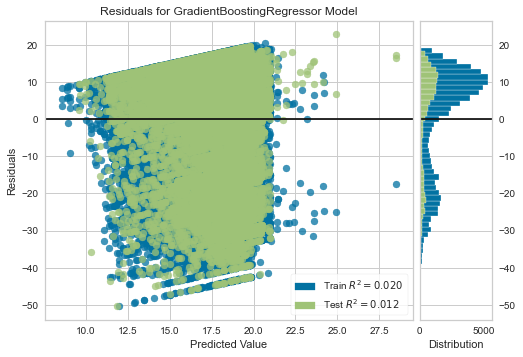

In [64]:
plot_model(model_selected)

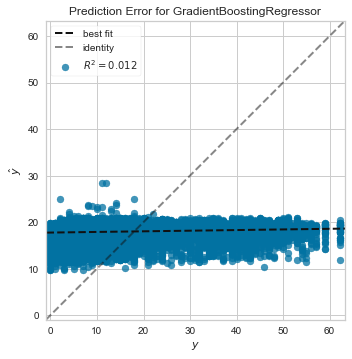

In [65]:
plot_model(model_selected, plot = 'error')

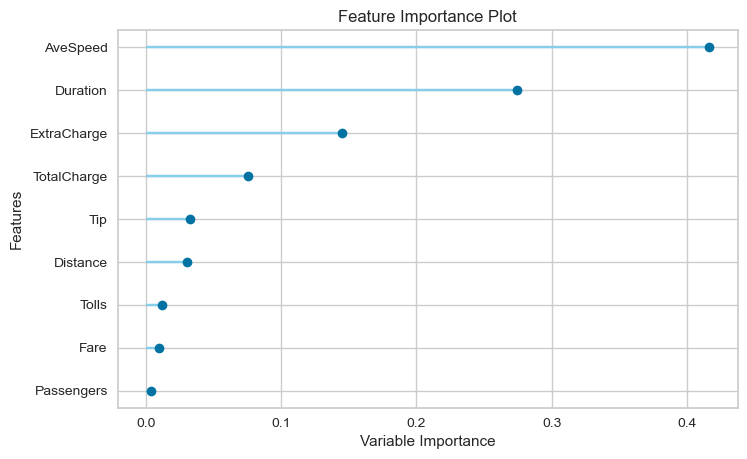

In [66]:
plot_model(model_selected, plot='feature')

## Using Regression or Classification Models

In [67]:
df

,Passengers,Distance,Fare,ExtraCharge,Tip,Tolls,TotalCharge,Duration,AveSpeed,TripCount
0,1.00,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,14.00
1,1.00,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,2.00
2,1.00,18.60,52.00,0.00,8.00,0.00,60.80,28.92,38.59,15.00
3,1.00,1.55,7.00,0.50,1.70,0.00,10.00,5.90,15.76,14.00
4,1.00,1.55,7.00,0.50,1.70,0.00,10.00,5.90,15.76,2.00
...,...,...,...,...,...,...,...,...,...,...
91775,1.00,0.10,3.50,0.50,0.95,0.00,5.75,1.92,3.13,2.00
91776,1.00,0.10,3.50,0.50,0.95,0.00,5.75,1.92,3.13,7.00
91777,1.00,1.50,7.50,0.50,0.00,0.00,8.80,7.57,11.89,24.00
91778,1.00,1.50,7.50,0.50,0.00,0.00,8.80,7.57,11.89,2.00


In [68]:
df.columns

Index(['Passengers', 'Distance', 'Fare', 'ExtraCharge', 'Tip', 'Tolls', 'TotalCharge', 'Duration', 'AveSpeed', 'TripCount'], dtype='object')

In [69]:
df.drop(['Passengers','Fare','Tolls','Distance','Tip'], axis=1, inplace=True)

In [70]:
df.head()

,ExtraCharge,TotalCharge,Duration,AveSpeed,TripCount
0,0.00,60.80,28.92,38.59,14.00
1,0.00,60.80,28.92,38.59,2.00
2,0.00,60.80,28.92,38.59,15.00
3,0.50,10.00,5.90,15.76,14.00
4,0.50,10.00,5.90,15.76,2.00


### Train Test Split

In [71]:
df.shape

(91780, 5)

In [72]:
X = df.iloc[:,:4]
y = df.iloc[:,4]

In [73]:
X.values, y.values

(array([[ 0.        , 60.8       , 28.91666667, 38.59365994],
        [ 0.        , 60.8       , 28.91666667, 38.59365994],
        [ 0.        , 60.8       , 28.91666667, 38.59365994],
        ...,
        [ 0.5       ,  8.8       ,  7.56666667, 11.89427313],
        [ 0.5       ,  8.8       ,  7.56666667, 11.89427313],
        [ 0.5       ,  8.8       ,  7.56666667, 11.89427313]]),
 array([14.,  2., 15., ..., 24.,  2.,  7.]))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73424, 4), (18356, 4), (73424,), (18356,))

## Feature Scaling

In [76]:
X_train

array([[ 0.        , 59.84      , 72.93980523,  6.60491116],
       [ 0.5       , 13.8       , 11.96666667, 18.55153203],
       [ 0.        , 13.8       , 21.45      ,  3.07692308],
       ...,
       [ 0.5       , 10.8       , 10.01666667,  8.86522463],
       [ 0.        ,  9.3       , 11.88333333,  5.04908836],
       [ 0.5       , 11.15      , 10.66666667,  7.3125    ]])

In [77]:
scaler = StandardScaler()

In [78]:
X_train_scaled = scaler.fit_transform(X_train)

In [79]:
X_test_scaled = scaler.transform(X_test)

In [80]:
X_train_scaled

array([[-0.76817463,  1.74242127,  3.12171919, -0.85719621],
       [ 0.61389971, -0.58533056, -0.5827477 ,  0.54232951],
       [-0.76817463, -0.58533056, -0.00658096, -1.27049383],
       ...,
       [ 0.61389971, -0.73700857, -0.70122135, -0.59240444],
       [-0.76817463, -0.81284757, -0.58781068, -1.03945812],
       [ 0.61389971, -0.7193128 , -0.66173014, -0.77430341]])

In [81]:
X_test_scaled

array([[ 0.61389971, -0.66116957, -0.67793166, -0.21165389],
       [ 0.61389971,  0.70696607,  0.06227552,  1.63087226],
       [ 1.99597405,  1.31620607,  1.38168722, -0.09189172],
       ...,
       [-0.76817463, -0.6965611 , -0.59287365, -1.09484783],
       [ 0.61389971, -0.91396625, -0.85311065, -1.25690679],
       [ 1.99597405, -0.34770168, -0.5827477 ,  0.48359223]])

In [82]:
reg_model = GradientBoostingRegressor()

In [83]:
reg_model.fit(X_train_scaled,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
y_pred = reg_model.predict(X_test_scaled)

In [85]:
y_pred

array([17.79690374, 17.90334157, 19.59634215, ..., 18.96743504,
       19.30822046, 18.09542829])

### Model Evaluation

In [86]:
mse = mean_squared_error(y_test,y_pred)
mse

214.42353389222544

In [87]:
rmse = np.sqrt(mse)
rmse

14.643207773306552

In [88]:
r2score = r2_score(y_test,y_pred)
r2score

0.011714586173755093

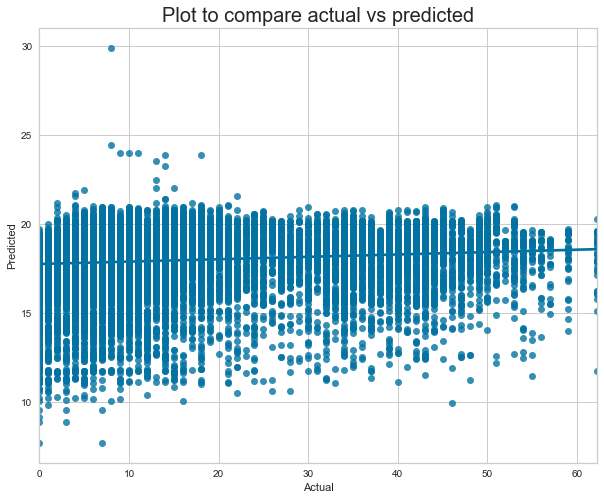

In [89]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Plot Feature Importances

In [90]:
reg_model.feature_importances_

array([0.14828097, 0.0870347 , 0.28805943, 0.4766249 ])

In [91]:
feat_importances = pd.Series(reg_model.feature_importances_, index=X.columns)

In [92]:
feat_importances

ExtraCharge   0.15
TotalCharge   0.09
Duration      0.29
AveSpeed      0.48
dtype: float64

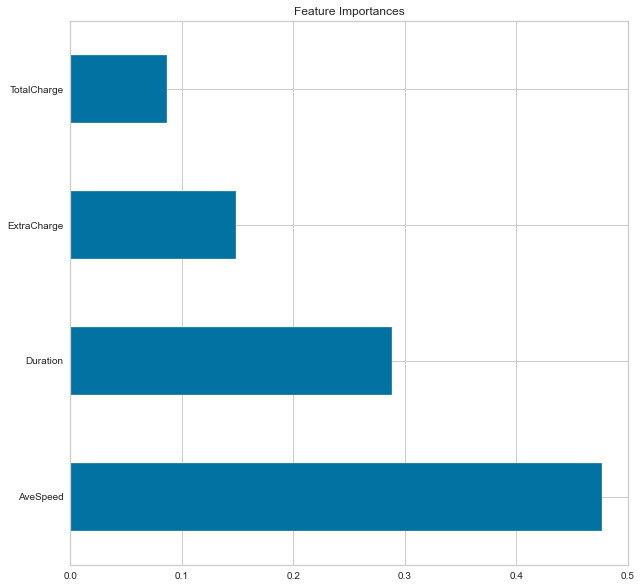

In [93]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### Cross-Validation

In [94]:
cv = cross_val_score(reg_model,X,y,cv=5,verbose=1,scoring='neg_root_mean_squared_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.5s finished


In [95]:
cv.mean()

-14.646759263353818